# CCL matter power spectra calculations
In this example, we will calculate the matter power spectrum using a couple of different methods.

In [1]:
import numpy as np
import pyccl as ccl
import pylab as plt
import math
%matplotlib inline

We begin by defining a set of cosmological parameters, as usual:

In [2]:
cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.045, h=0.67, A_s=2.1e-9, n_s=0.96, 
                      transfer_function='boltzmann_class')

Note that we have explicitly defined how transfer functions should be calculated for the linear matter power spectrum, by using the `transfer_function` keyword argument. The following types of transfer function are available:

In [3]:
print(ccl.core.transfer_function_types.keys())

dict_keys([None, 'eisenstein_hu', 'bbks', 'boltzmann_class', 'boltzmann_camb'])


The default is `boltzmann_camb`, which uses a full transfer function calculation from the CAMB Boltzmann code. This is one of the most accurate options at the level of linear pertubation theory, but will be less accurate at non-linear scales.

If we were less interested in precision but wanted to improve speed, we could have chosen the `eisenstein_hu` option instead.

Likewise, the `Cosmology()` object constructor also has a `matter_power_spectrum` argument that can be changed. There is no need to do this for now, however.

### How CCL caches results
Now, we can calculate the linear and non-linear matter power spectra as a function of wavenumber. Before we do that though, let's just perform a quick test to see how CCL caches the results of calculations:

In [4]:
print(cosmo.has_linear_power)
print(cosmo.has_sigma)

False
False


Both of these status indicators are `False`, showing that CCL hasn't yet computer power spectra (transfer functions) or sigma(R); the cache is currently empty. When we calculate the power spectrum, though, the result will be stored (and splined) for future use.

### Calculate the matter power spectrum
Now, let's calculate the power spectra:

In [5]:
kmin, kmax, nk = 1e-4, 1e1, 128
k = np.logspace(np.log10(kmin), np.log10(kmax), nk) # Wavenumber
a = 1. # Scale factor

In [6]:
#necessary to have class
pk_lin = ccl.linear_matter_power(cosmo, k, a)

In [7]:
pk_nl = ccl.nonlin_matter_power(cosmo, k, a)

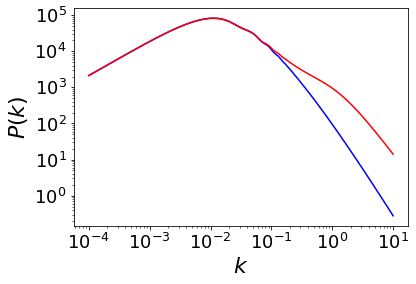

In [8]:
plt.plot(k, pk_lin, 'b-')
plt.plot(k, pk_nl, 'r-')

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k$',fontsize=22)
plt.ylabel(r'$P(k)$',fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.show()

We can see that the cache has now been populated:

In [9]:
print(cosmo.has_linear_power)

True


Subsequent calls to `linear_matter_power()` will be faster for the same cosmology (i.e. the same `Cosmology` object).

### Power spectrum normalisation, sigma8
We can also calculate the normalisation of the power spectrum, sigma8. Note that this parameter is currently undefined:

In [10]:
print(cosmo['sigma8'])

nan


If we now call the `sigma8()` function, this value should be populated (although at present this has not been implemented).

In [11]:
print(ccl.sigma8(cosmo))
print(cosmo['sigma8'])

0.840421151634517
nan


### Adding the impact of baryons
The power spectrum can also be modified to include the impact of baryons. The overall effect will be to include a scale-dependence which will suppress the power spectrum at scales smaller than a few Mpc/h. Here is an example:

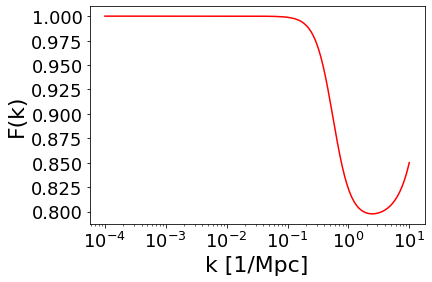

In [12]:
cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.045, h=0.67, A_s=2.1e-9, n_s=0.96)
cosmo_bar = ccl.Cosmology(Omega_c=0.27, Omega_b=0.045, h=0.67, A_s=2.1e-9, n_s=0.96, baryons_power_spectrum='bcm')

# Plot ratio of NL power spectra with/without baryons
pk_nl = ccl.nonlin_matter_power(cosmo, k, a)
pk_nl_bar = ccl.nonlin_matter_power(cosmo_bar, k, a)
plt.plot(k, pk_nl_bar/pk_nl, 'r-')

plt.xscale('log')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('k [1/Mpc]',fontsize=22)
plt.ylabel('F(k)',fontsize=22)

plt.show()

### Using the cosmic emulator
The power spectrum can also be obtained from the cosmic emulator. In this case, the user needs to pass suitable choices for the transfer function and matter power spectrum. Here is an example:

In [13]:
cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.05, h=0.67, sigma8=0.8, n_s=0.96, 
                      Neff=3.04, transfer_function='boltzmann_class', matter_power_spectrum='emu')

Then we proceed as usual for obtaining the matter power spectrum.

/Users/elisa/Documents/lsst_ccl/CCL/pyccl/core.py:684: CCLWarning: None of the linear power spectrum models in CCL are consistent with that implictly used in the emulated non-linear power spectrum!
  category=CCLWarning)


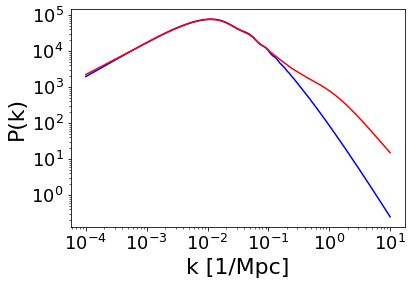

In [14]:
# Plot linear and nonlinear power spectra
pk_nl = ccl.nonlin_matter_power(cosmo, k, a)
pk_lin = ccl.linear_matter_power(cosmo, k, a)

plt.plot(k, pk_lin, 'b-')
plt.plot(k, pk_nl, 'r-')

plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('k [1/Mpc]',fontsize=22)
plt.ylabel('P(k)',fontsize=22)

plt.show()

### Cosmologies with neutrinos
CCL supports equal and unequal neutrino mass cosmologies. We give some examples below of how to set them up and obtain power spectra for them. Note that for the emulator case, we only support equal-mass cases.

In [15]:
cosmo_nu_eq = ccl.Cosmology(Omega_c=0.27, Omega_b=0.05, h=0.67, sigma8=0.8, n_s=0.96
                            , m_nu=0.06, m_nu_type='equal') #sum of the neutrino masses = 0.06
cosmo_nu_uneq = ccl.Cosmology(Omega_c=0.27, Omega_b=0.05, h=0.67, sigma8=0.8, n_s=0.96 
                              , m_nu=[0.02,0.03,0.04], m_nu_type='list') #sum of neutrino masses = 0.02 + 0.03 + 0.04

pk_nl_nu_eq = ccl.nonlin_matter_power(cosmo_nu_eq, k, a)
pk_nl_nu_uneq = ccl.nonlin_matter_power(cosmo_nu_uneq, k, a)

/Users/elisa/Documents/lsst_ccl/CCL/pyccl/core.py:644: CCLWarning: CCL does not properly compute the linear growth rate in cosmological models with massive neutrinos!
  category=CCLWarning)


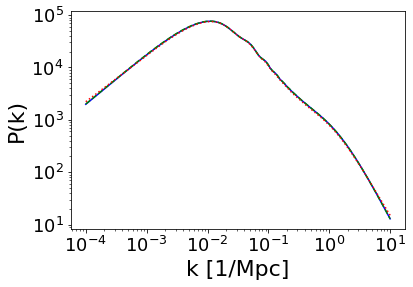

In [16]:
plt.plot(k, pk_nl_nu_eq, 'b-')
plt.plot(k, pk_nl_nu_uneq, 'g--')
plt.plot(k, pk_nl, 'r:')

plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('k [1/Mpc]',fontsize=22)
plt.ylabel('P(k)',fontsize=22)
plt.show()

## Example halo-model power spectrum calculation

We will now calculate the halo-model matter power spectrum. We begin by defining a set of cosmological parameters. 

In [17]:
cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.045, h=0.67, sigma8=0.8, n_s=0.96, Neff=3.04,
                      transfer_function='boltzmann_class',
                      matter_power_spectrum='halofit',
                      mass_function='shethtormen',
                      halo_concentration='duffy2008'
                     )

Note that this time we have specified some choices about the mass function and halo concentration we will use. The following types are available:

In [18]:
print('Mass functions:', ccl.core.mass_function_types.keys())
print('Halo concentration:', ccl.core.halo_concentration_types.keys())

Mass functions: dict_keys(['angulo', 'tinker', 'tinker10', 'watson', 'shethtormen'])
Halo concentration: dict_keys(['bhattacharya2011', 'duffy2008', 'constant_concentration'])


Consistency of halo definition is enforced for each mass function or halo concentration. The halo-model power spectrum calculation currently makes the assumption that haloes have the 'virial' definition for their masses, so a mass function and halo concentration must be chosen that are consistent with this assumption.

### Calculate the matter power spectrum
Now, let's calculate various different types of power spectra.

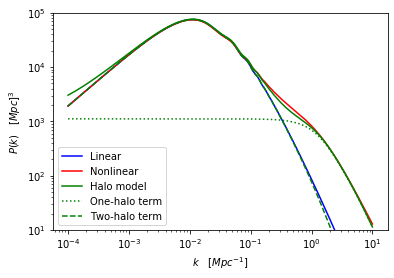

In [20]:
# Wavenumber
kmin=1e-4
kmax=1e1
nk=128
k = np.logspace(np.log10(kmin), np.log10(kmax), nk) 

# Scale factor
a = 1. 

# Calculate all these different P(k)
pk_li = ccl.linear_matter_power(cosmo, k, a)
pk_nl = ccl.nonlin_matter_power(cosmo, k, a)
pk_hm = ccl.halomodel_matter_power(cosmo, k, a)
pk_1h = ccl.halomodel.onehalo_matter_power(cosmo, k, a)
pk_2h = ccl.halomodel.twohalo_matter_power(cosmo, k, a)

plt.plot(k, pk_li, 'b-',  label='Linear')
plt.plot(k, pk_nl, 'r-',  label='Nonlinear')
plt.plot(k, pk_hm, 'g-',  label='Halo model')
plt.plot(k, pk_1h, 'g:',  label='One-halo term')
plt.plot(k, pk_2h, 'g--', label='Two-halo term')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k\quad[Mpc^{-1}]$')
plt.ylabel(r'$P(k)\quad[Mpc]^3$')
plt.ylim([1e1,1e5])
plt.legend()
plt.show()

Above we make a plot of the power spectrum from linear theory, nonlinear theory
(by default the HALOFIT fitting function in CCL) and the halo-model power spectrum.
We also plot the contribution from the one- and two-halo terms for the halo model, the total is the sum.
Visually we see that the halo model power looks quite similar to the model for the nonlinear power.
However, we note that the halo-model power underpredicts the power around the transition between the one-
and two-halo terms and also that there is a strange contribution from the one-halo term at extremely large scales.

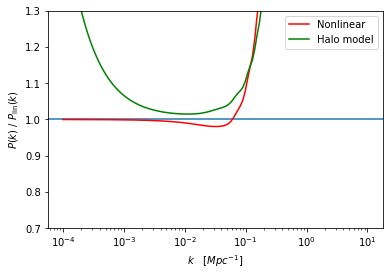

In [21]:
plt.axhline(1.)
plt.plot(k, pk_nl/pk_li, 'r-', label='Nonlinear')
plt.plot(k, pk_hm/pk_li, 'g-', label='Halo model')
plt.xscale('log')
plt.ylim([0.7,1.3])
plt.xlabel(r'$k\quad[Mpc^{-1}]$')
plt.ylabel(r'$P(k)$ / $P_\mathrm{lin}(k)$')
plt.legend()
plt.show()

Above we plot the ratio of the nonlinear and halo-model power to linear theory.
These curves diverge from the linear theory at the 10% level around k ~ 0.01h/Mpc.
We also see the problem with the halo model at very large scales where the one-halo term unphysically becomes
important for the power spectrum. This is a well-known problem with the fundamentals of the halo model
(see Cooray & Sheth 2002) and if you can think of a clever way to solve this issue you should publish it.

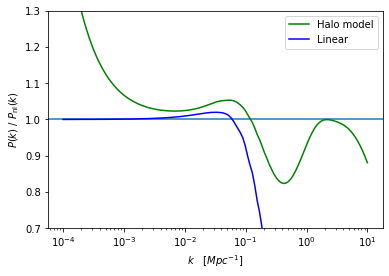

In [22]:
plt.axhline(1.)
plt.plot(k, pk_hm/pk_nl, 'g-', label='Halo model')
plt.plot(k, pk_li/pk_nl, 'b-', label='Linear')
plt.xscale('log')
plt.ylim([0.7,1.3])
plt.xlabel(r'$k\quad[Mpc^{-1}]$')
plt.ylabel(r'$P(k)$ / $P_\mathrm{nl}(k)$')
plt.legend()
plt.show()


Above we plot the ratio of the halo-model and linear power compared to the nonlinear fitting function.
The fitting function matches accurate measurements from simulations at the ~5% level but we see that the
halo-model deviates from the fitting function by more than this amount. A particular problem is the lack of
power in the transition region between the one- and two-halo terms, which is around $k = 0.3h/$Mpc in this plot.

We should not be surprised by this result, however. Many approximations go into the simple halo-model calculation
used here and the mismatch between the halo model and nonlinear theory is a result of these simplifications.
Still, the halo-model is useful approxmiate description of the power spectrum, so don't be too sad.